In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from filterdesign import design_butterworth

[[ 0.0133592   0.0267184   0.0133592   1.         -1.61522791  0.80215242]
 [ 1.         -2.          1.          1.         -1.80304875  0.87377008]]
[[ 0.01336336 -0.02672671  0.01336336  1.         -1.61580874  0.80201779]
 [ 1.          2.          1.          1.         -1.80361804  0.87386436]]


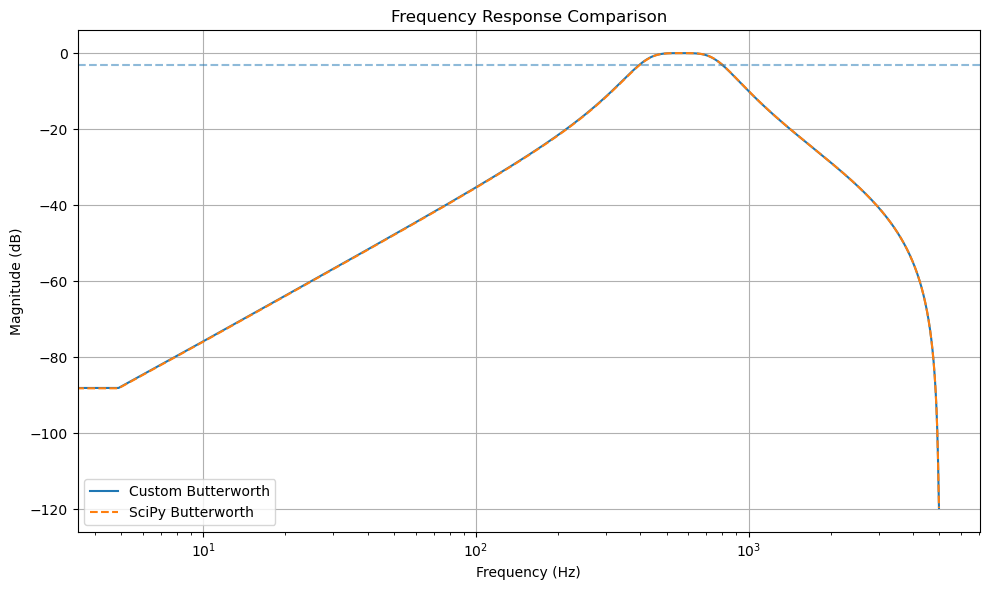

In [59]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

# === Your custom Butterworth function ===
# Include the `design_butterworth()` function from above here

# === Validation setup ===
fs = 10000           # Sampling frequency (Hz)
order = 2       # Filter order
cutoff = (400, 800)     # Lowpass cutoff (Hz)
ftype = 'bandpass'   # Filter type

# Your custom filter coefficients (SOS)
custom_sos = design_butterworth(order, ftype, fs, f1=cutoff[0], f2=cutoff[1])

# SciPy reference filter (matched settings)
nyq = fs / 2
scipy_sos = signal.butter(order, cutoff, btype=ftype, output='sos', fs=fs)

import numpy
print(numpy.array(scipy_sos))
print(numpy.array(custom_sos))

# === Frequency response comparison ===
def plot_sos_response(sos, label, style='-'):
    w, h = signal.sosfreqz(sos, worN=1024, fs=fs)
    plt.plot(w, 20 * np.log10(abs(h) + 1e-6), style, label=label)

plt.figure(figsize=(10, 6))
plot_sos_response(custom_sos, 'Custom Butterworth')
plot_sos_response(scipy_sos, 'SciPy Butterworth', '--')
plt.title('Frequency Response Comparison')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Magnitude (dB)')
#plt.axvline(cutoff, ls='--', alpha=0.5)
#plt.axvline(cutoff*2, ls='--', alpha=0.5)
plt.axhline(-3.0, ls='--', alpha=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()